<a href="https://colab.research.google.com/github/shahrambozorgnia/myproject/blob/main/myproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data preprocesing**

 **import libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**reading data**

In [6]:
diabetes_df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")


**Clean data**

In [7]:
diabetes_df.drop_duplicates(inplace=True)
diabetes_df.reset_index(drop=True, inplace=True)

**Define binary and non-binary attributes**

In [8]:
binary_attributes = ['Veggies', 'HighBP', 'HighChol', 'CholCheck', 'Sex', 'Stroke', 'HeartDiseaseorAttack',
                     'PhysActivity', 'Fruits', 'DiffWalk', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost']
non_binary_attributes = ['BMI', 'PhysHlth', 'MentHlth', 'Age', 'Income', 'Education', 'GenHlth']

**Categorize non-binary attributes**

In [9]:
diabetes_df['Weight_Group'] = pd.cut(diabetes_df['BMI'], bins=[0, 18.5, 25, 30, np.inf],
                                     labels=['Underweight', 'Healthy', 'Overweight', 'Obese'])
diabetes_df['Age_Group'] = pd.cut(diabetes_df['Age'], bins=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, np.inf],
                                  labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
                                          '60-64', '65-69', '70-74', '75-79', '80+'])
education_categories = {1: 'Not attended School', 2: 'Elementary', 3: 'Some High School',
                        4: 'High School Graduated', 5: 'Some College or Technical School', 6: 'College Graduate'}
diabetes_df['Education_Level'] = diabetes_df['Education'].map(education_categories)
income_categories = {1: 'Less than 10000 $', 2: 'Less than 15000 $', 3: 'Less than 20000 $',
                     4: 'Less than 25000 $', 5: 'Less than 35000 $', 6: 'Less than 50000 $',
                     7: 'Less than 75000 $', 8: '75000 $ or More'}
diabetes_df['Income_Level'] = diabetes_df['Income'].map(income_categories)
general_health_categories = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}
diabetes_df['General_Health'] = diabetes_df['GenHlth'].map(general_health_categories)
diabetes_status_categories = {0: 'No Diabetes', 1: 'Pre Diabetes', 2: 'Diabetes'}
diabetes_df['Disease_Status'] = diabetes_df['Diabetes_012'].map(diabetes_status_categories)

# **Data Visualization**

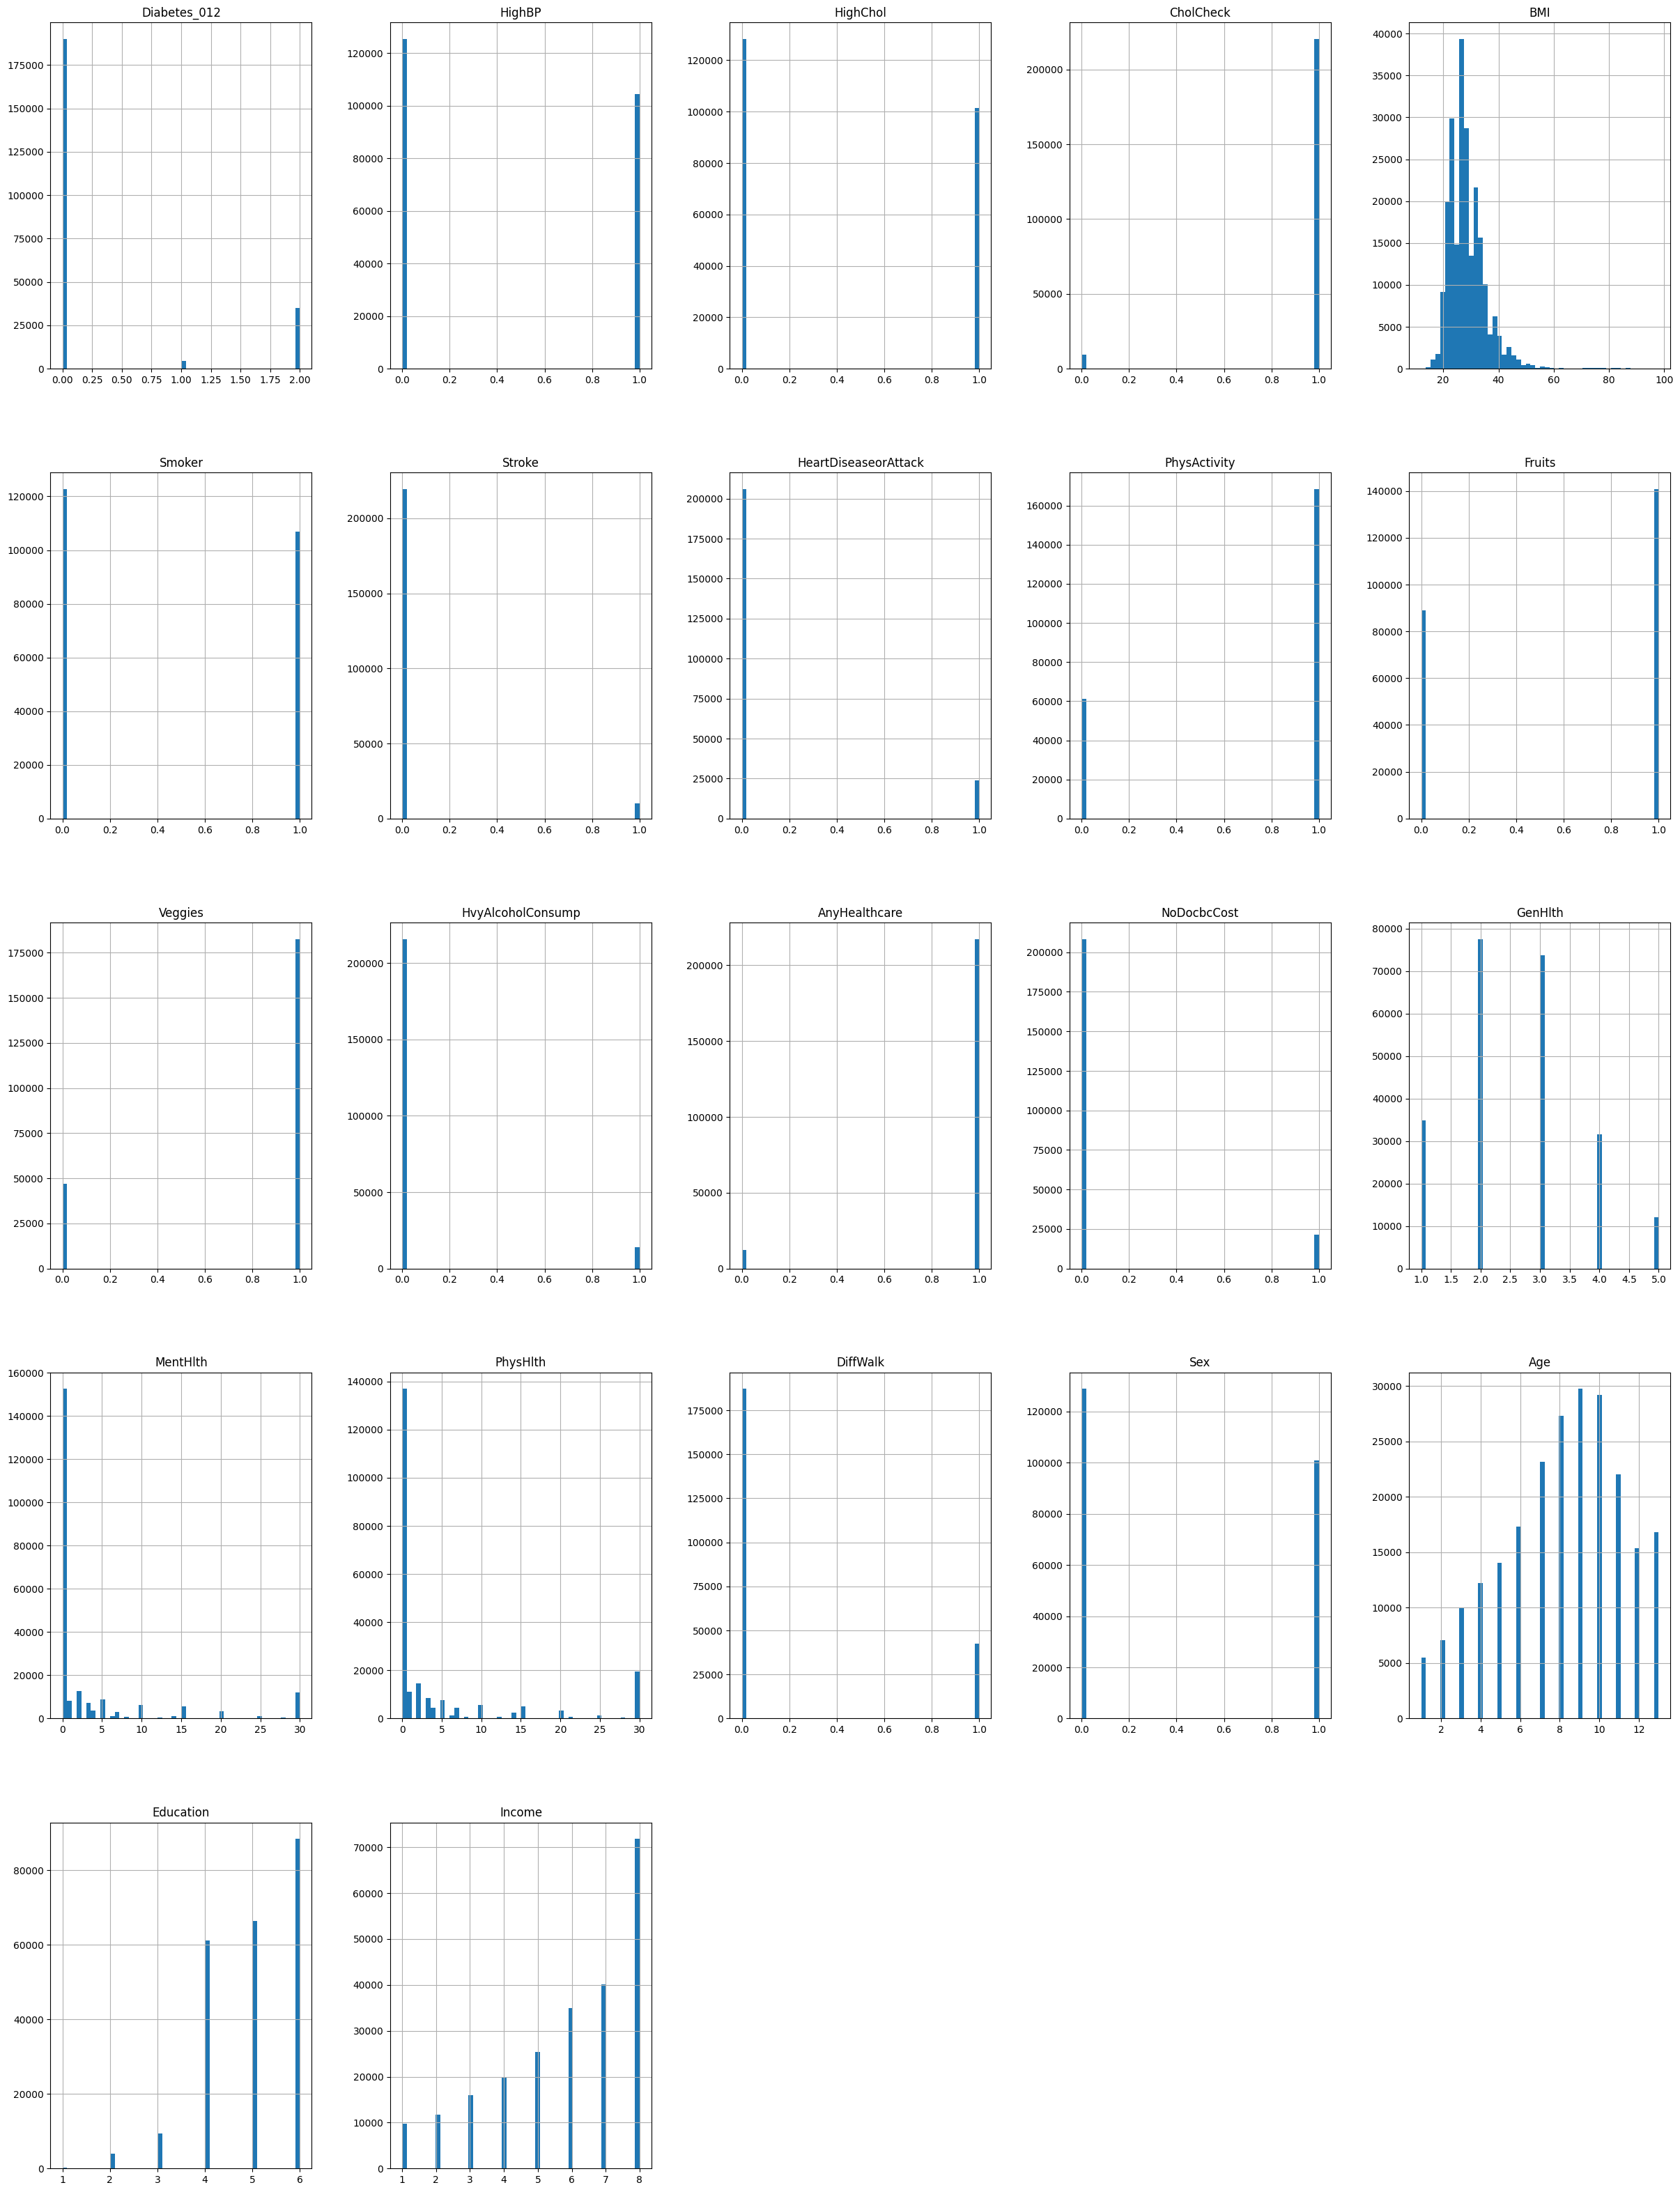

In [10]:
diabetes_df.hist(bins=50, figsize=(30, 40))
plt.show()

**Pair Plot**

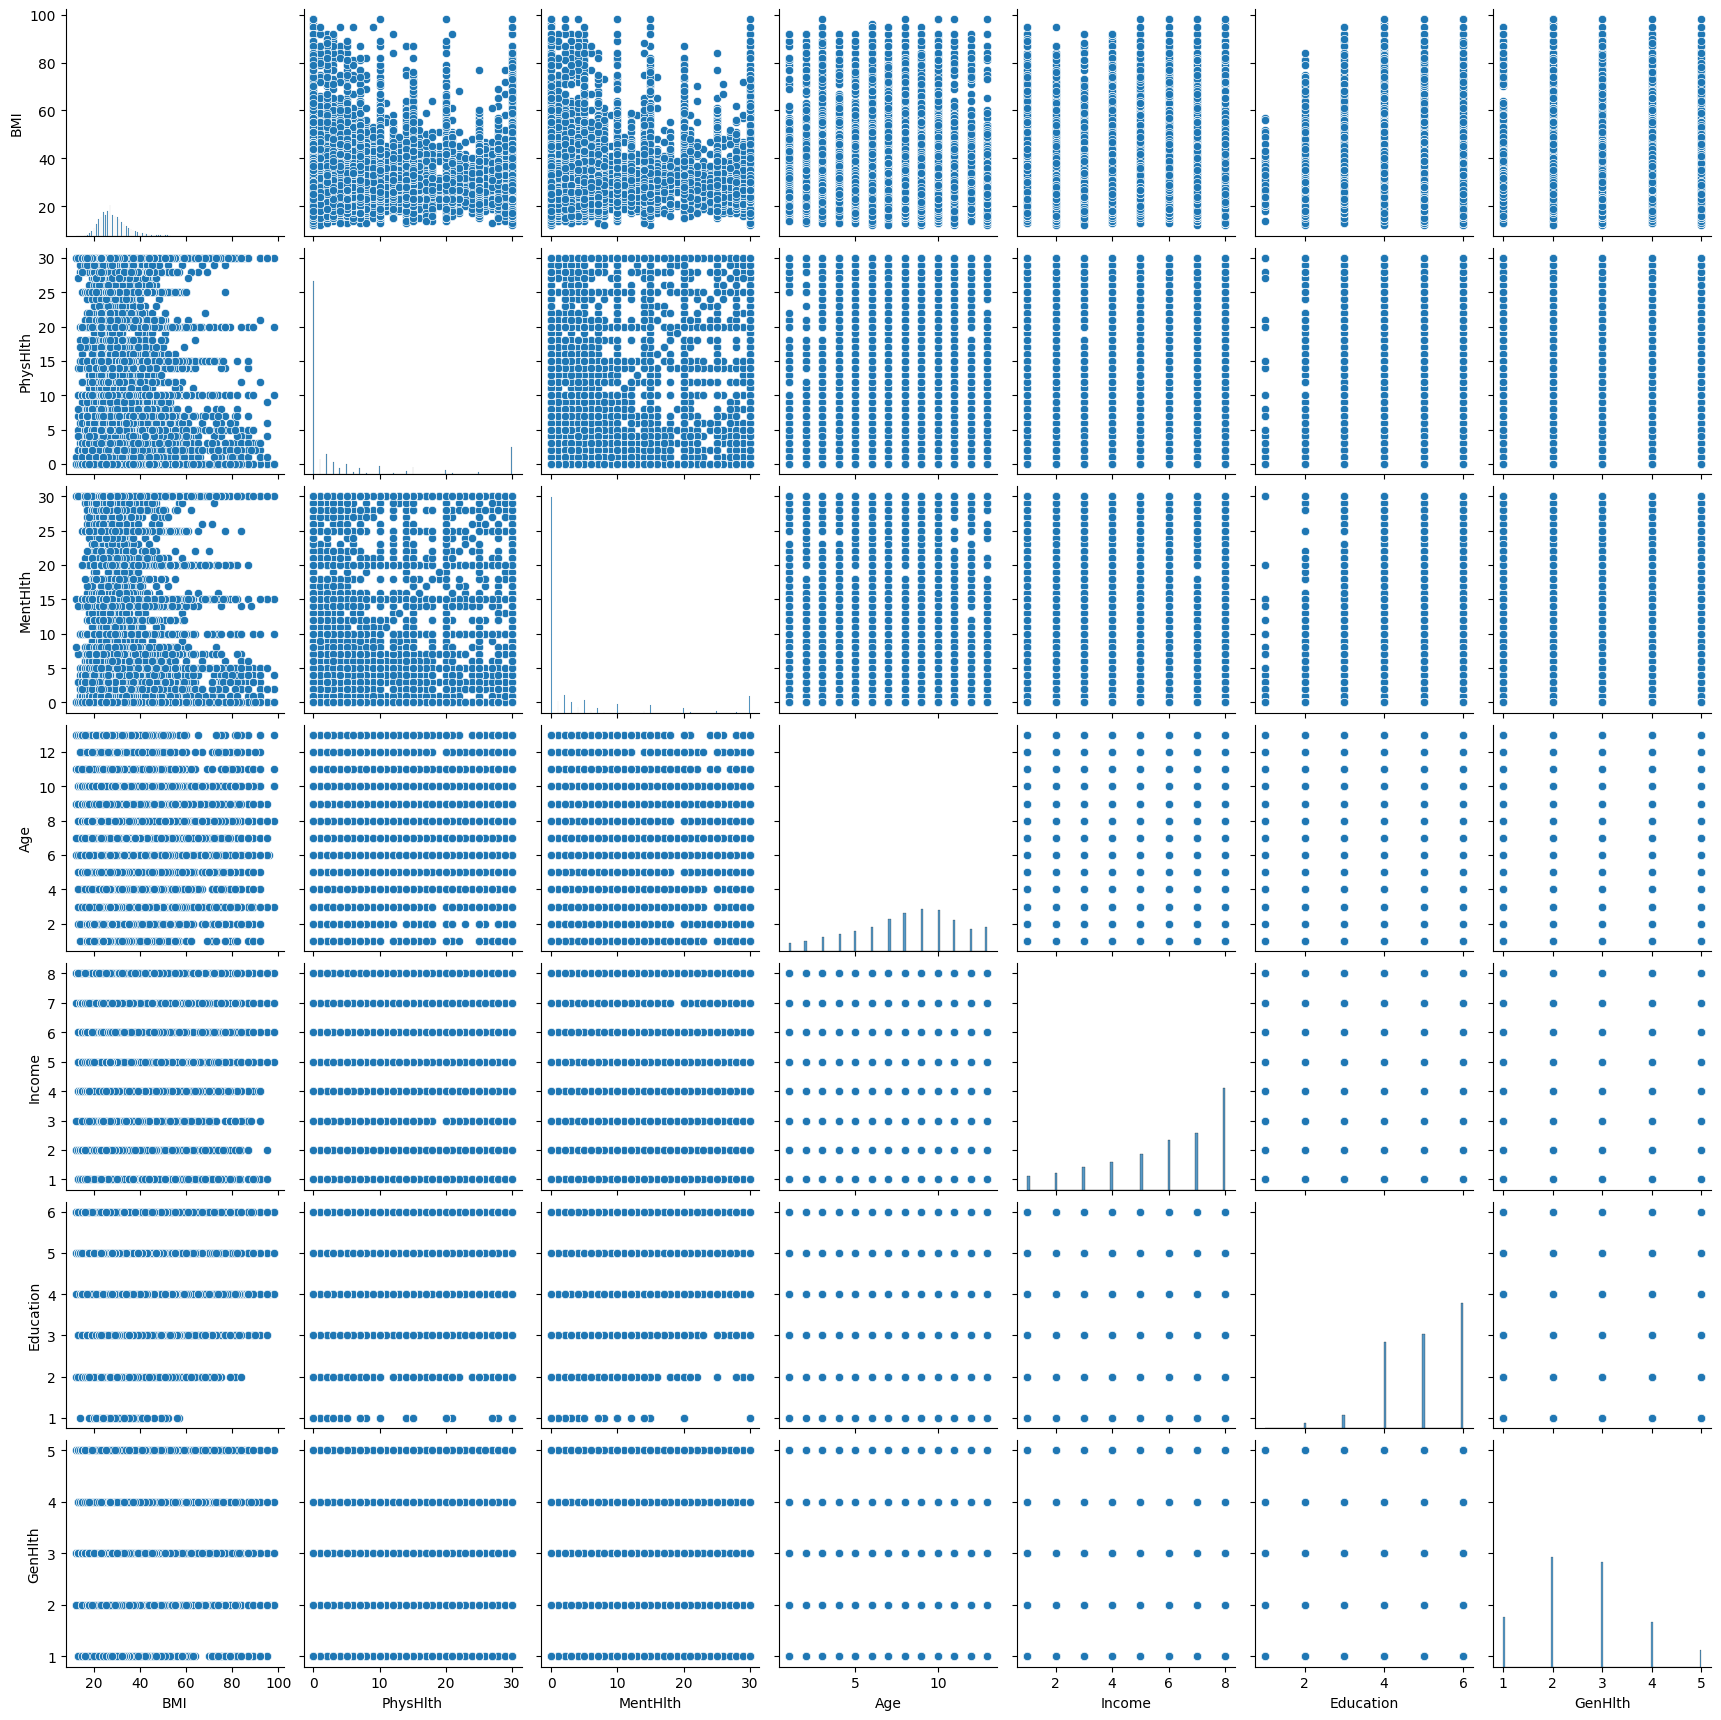

In [11]:
sns.pairplot(diabetes_df[non_binary_attributes])
plt.show()


**Value counts and plots**

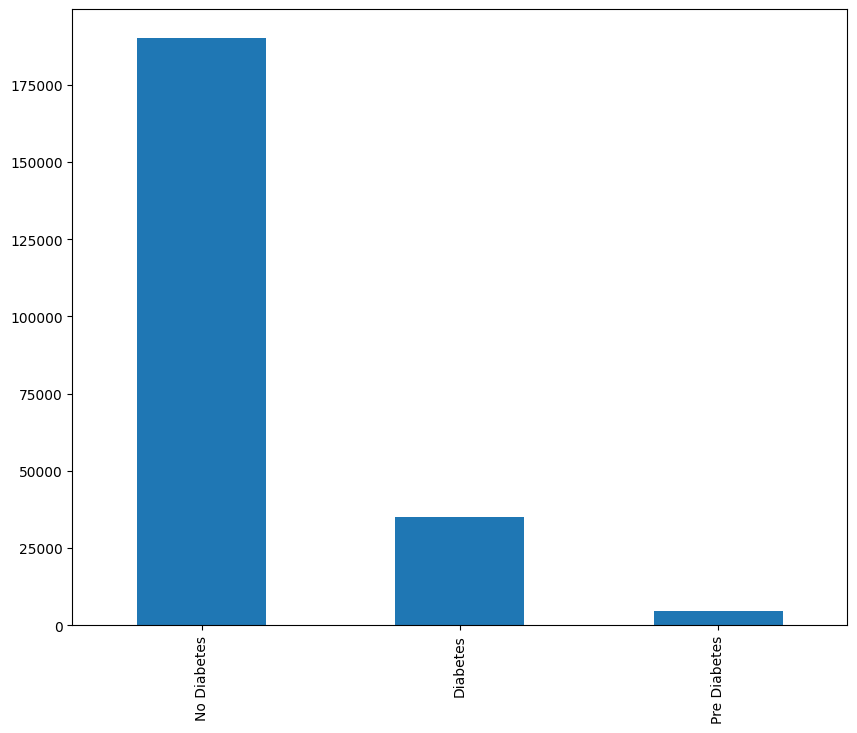

In [12]:
plt.figure(figsize=(10, 8))
diabetes_df['Disease_Status'].value_counts().plot(kind='bar')
plt.show()

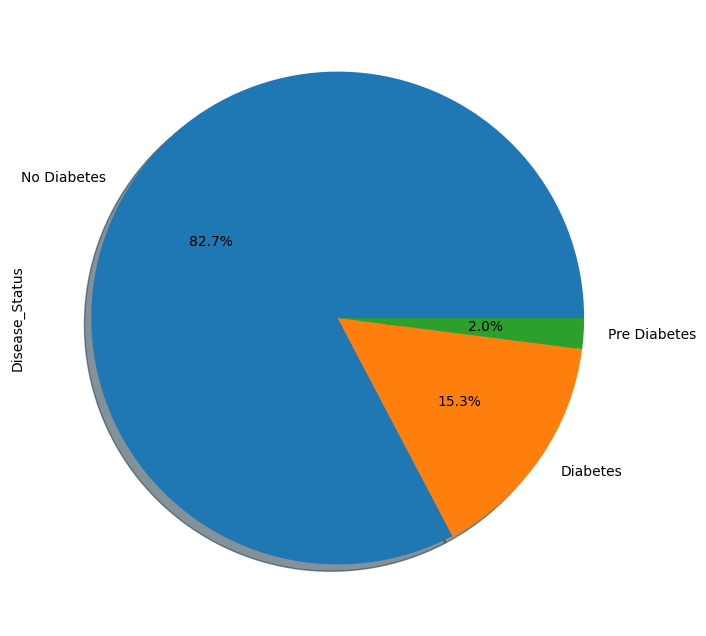

In [13]:
plt.figure(figsize=(10, 8))
diabetes_df['Disease_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.show()

**KDE Plot**

<ipython-input-14-7af0c788d495>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetes_df['BMI'], shade=True)


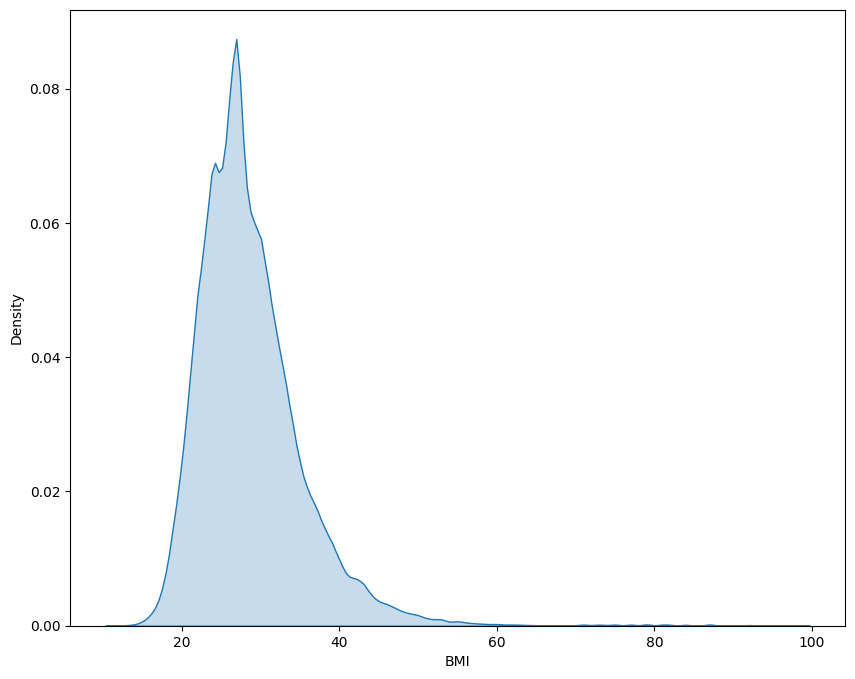

In [14]:
plt.figure(figsize=(10, 8))
sns.kdeplot(diabetes_df['BMI'], shade=True)
plt.show()

**Distribution of Age**

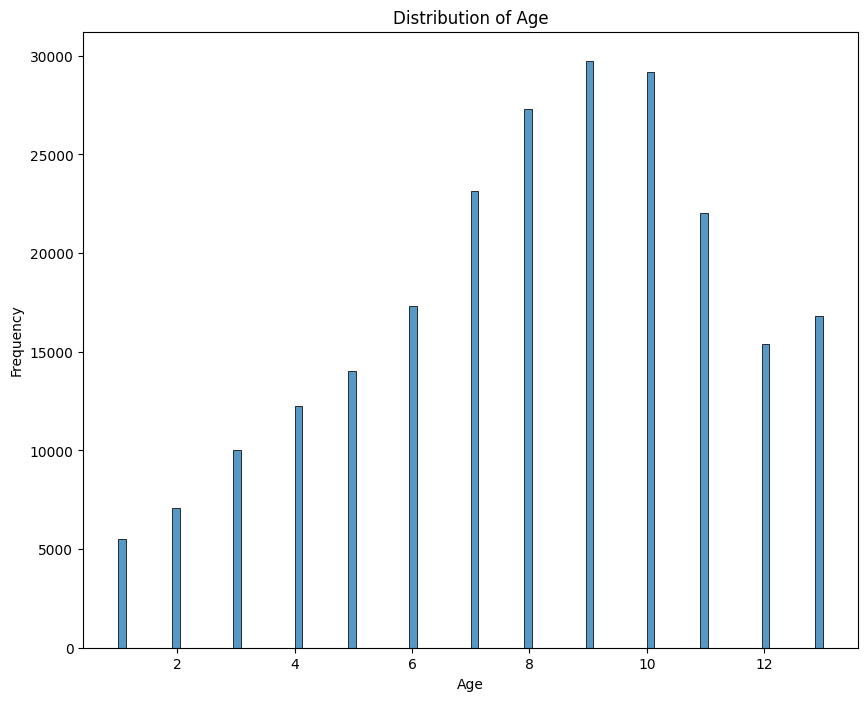

In [15]:
plt.figure(figsize=(10, 8))
sns.histplot(diabetes_df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Distribution of BMI across different Disease Status**

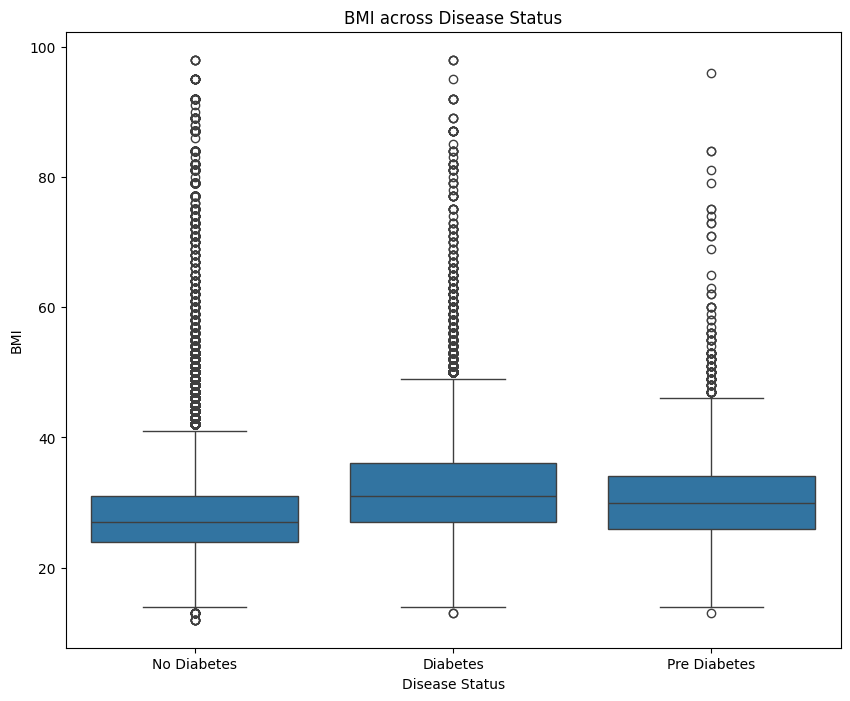

In [16]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Disease_Status', y='BMI', data=diabetes_df)
plt.title('BMI across Disease Status')
plt.xlabel('Disease Status')
plt.ylabel('BMI')
plt.show()

**Boxplot for General Health vs. BMI**

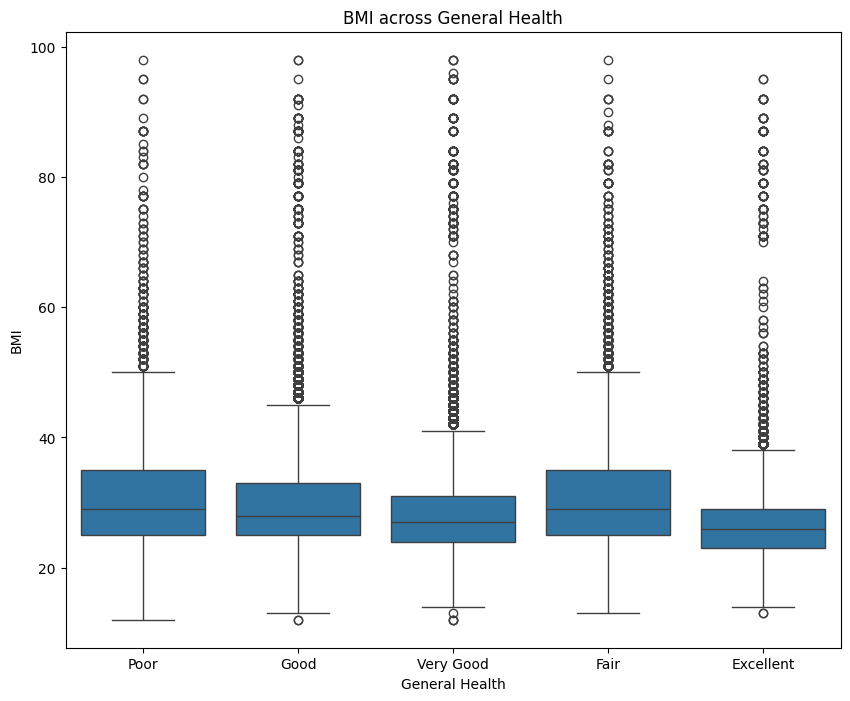

In [17]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='General_Health', y='BMI', data=diabetes_df)
plt.title('BMI across General Health')
plt.xlabel('General Health')
plt.ylabel('BMI')
plt.show()

**Visualize correlation**

<ipython-input-18-25d2eddc3687>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diabetes_df.corr(), annot=True, cmap='YlOrBr')


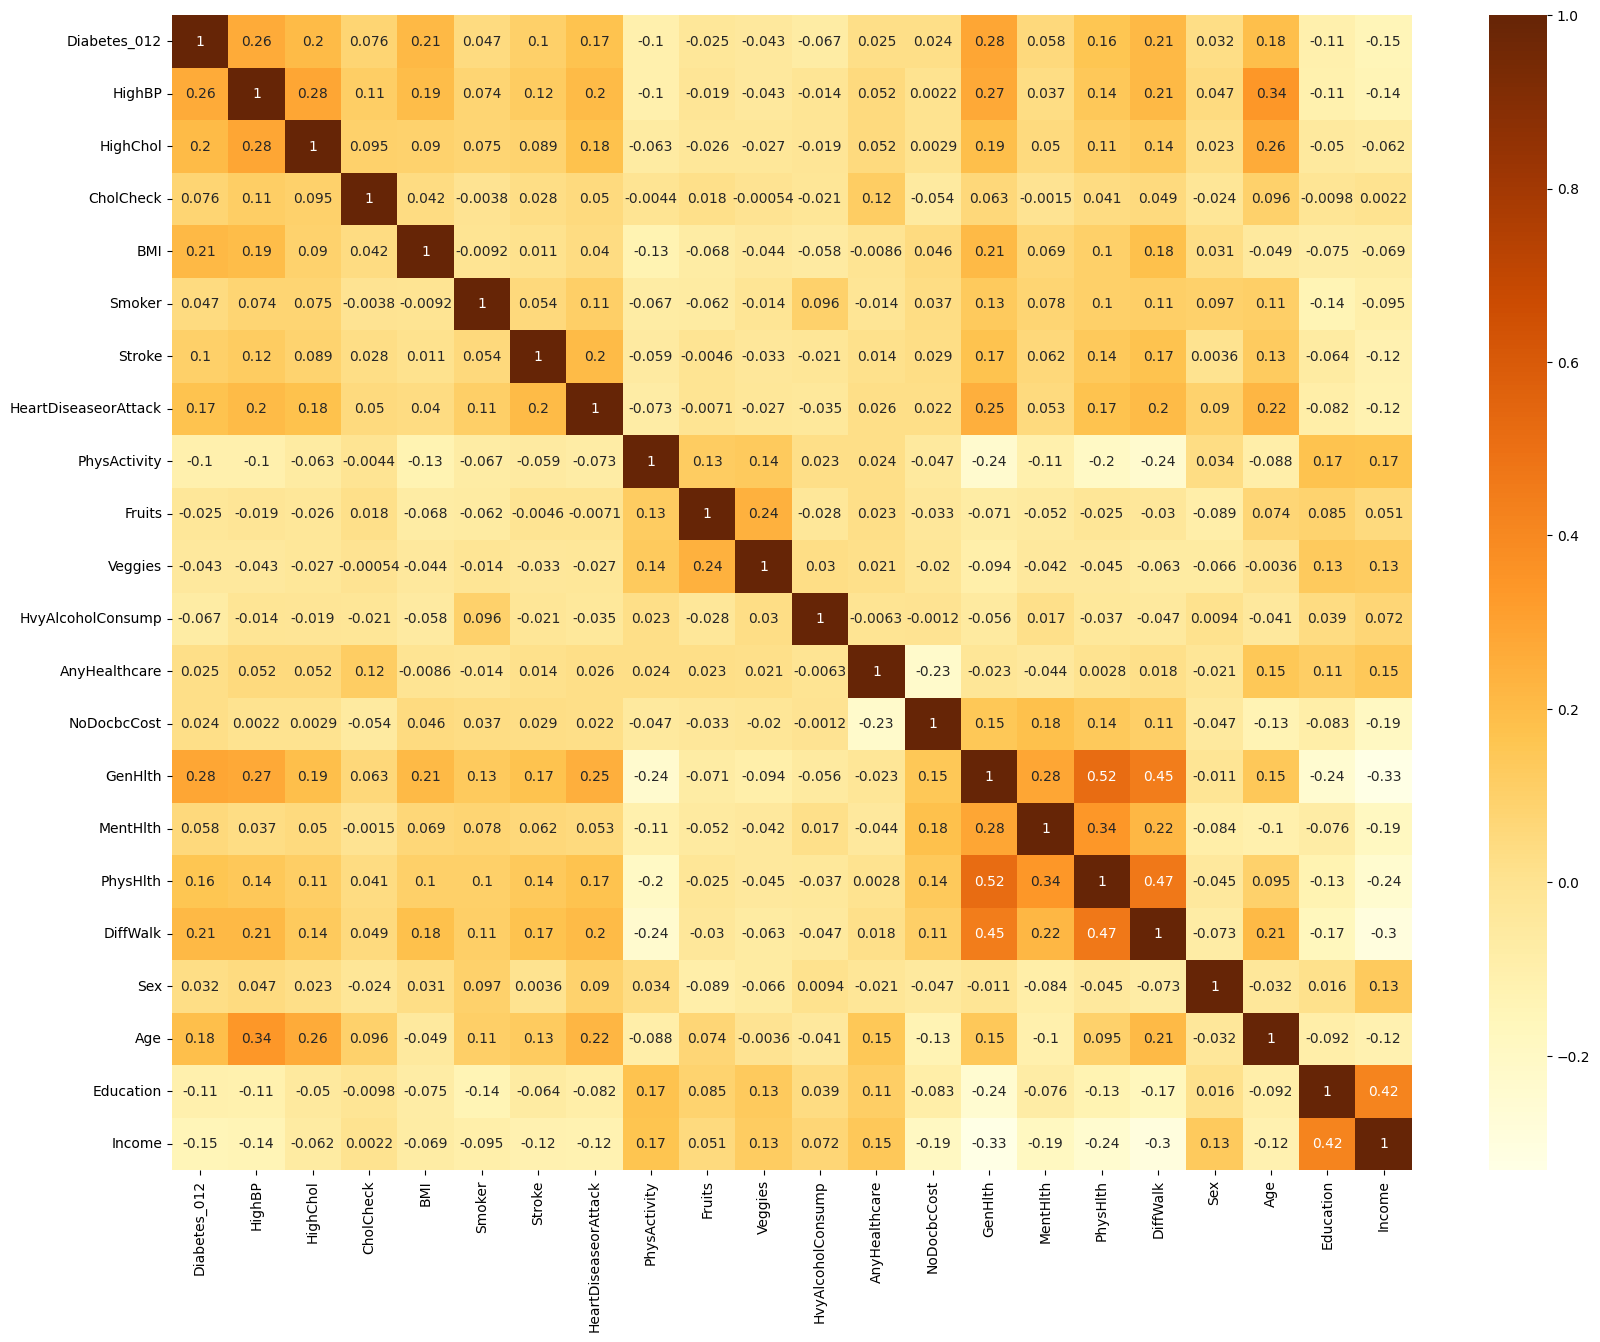

In [18]:
plt.figure(figsize=(20, 15))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='YlOrBr')
plt.show()

**Bar chart for Smokers & General Health**

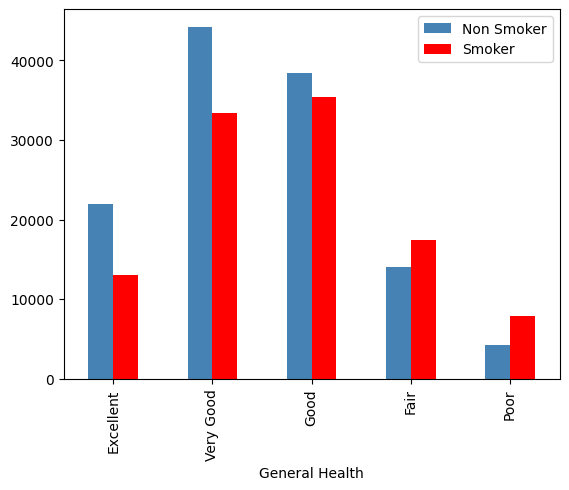

In [19]:
df_smoker_gen_health = pd.DataFrame({'General Health': ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'],
                                     'Non Smoker': [21902, 44203, 38350, 14088, 4238],
                                     'Smoker': [13005, 33333, 35364, 17458, 7840]})
df_smoker_gen_health.set_index('General Health').plot(kind='bar', color=['steelblue', 'red'])
plt.show()

# ***Class for Diabetes dataset and Machine Learning Models***

In [37]:
class DiabetesDataset:
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)

    def explore_data(self):
        print("First five rows of the dataset:")
        print(self.data.head())
        print("\nSummary statistics:")
        print(self.data.describe())
        print("\nMissing values:")
        print(self.data.isnull().sum())

    def clean_data(self):
        self.data = self.data.dropna()

    def visualize_data(self):
        sns.histplot(self.data['Diabetes_012'], kde=False)
        plt.title('Distribution of Diabetes Indicator')
        plt.show()

        sns.scatterplot(x='BMI', y='Diabetes_012', data=self.data)
        plt.title('BMI vs. Diabetes Indicator')
        plt.show()

    def build_regression_model(self):
        X = self.data.drop('Diabetes_012', axis=1)
        y = self.data['Diabetes_012']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f'Mean Squared Error: {mse}')
        return model, X_test, y_test, mse

    def build_decision_tree(self):
        X = self.data.drop('Diabetes_012', axis=1)
        y = self.data['Diabetes_012']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        tree_model = DecisionTreeClassifier()
        tree_model.fit(X_train, y_train)
        return tree_model, X_test, y_test

    def plot_regression_results(self, model, X_test, y_test):
        y_pred = model.predict(X_test)
        plt.scatter(y_test, y_pred, alpha=0.3)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs Predicted Values')
        plt.show()

    def plot_decision_tree(self, model):
        plt.figure(figsize=(20, 10))
        plot_tree(model, filled=True, feature_names=self.data.columns[:-1],
                  class_names=['No Diabetes', 'Pre Diabetes', 'Diabetes'], fontsize=10)
        plt.show()

**main function**

First five rows of the dataset:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0

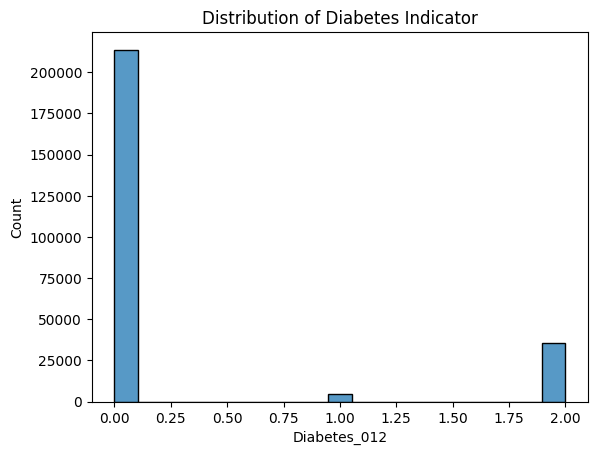

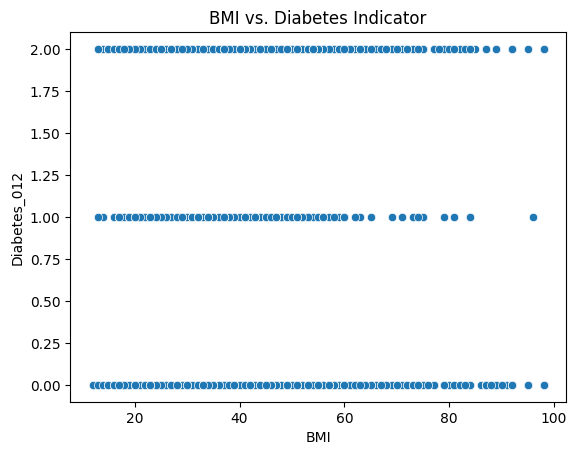

Mean Squared Error: 0.3997537253620238
The Mean Squared Error of the linear regression model is: 0.3997537253620238


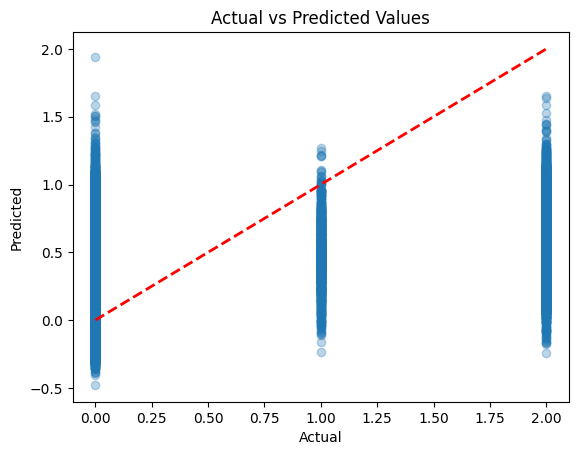

In [ ]:
def main():
    file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
    dataset = DiabetesDataset(file_path)
    dataset.explore_data()
    dataset.clean_data()
    dataset.visualize_data()

    # Linear Regression
    model, X_test, y_test, mse = dataset.build_regression_model()
    print(f"The Mean Squared Error of the linear regression model is: {mse}")
    dataset.plot_regression_results(model, X_test, y_test)

    # Decision Tree
    tree_model, X_test_tree, y_test_tree = dataset.build_decision_tree()
    dataset.plot_decision_tree(tree_model)

if __name__ == "__main__":
    main()